# Proyecto Programación para análisis de datos

In [1]:
import numpy as np
import pandas as pd
import os, time
import pickle, gzip
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

## 1. Carga del data set

In [2]:
df = pd.read_csv('IBM.csv',delimiter=',')
df.shape

(1470, 35)

El data Set cargado nos brinda información de empleados de IBM, informacion tal como la edad, nivel de ecuación, nivel de satisfaccion con su trabajo, rol, antiguedad en la empresa, distancia de su casa a su puesto de trabajo, entre otras varibales que veremos a detalle mas adelante.

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 2. Preparación de los datos para el análisis

En esta primera parte se evalua la existencia de datos faltantes y se codifican algunas variables con el fin de realizar un mejor análisis de los atributos presentes en el data set.

Veremos si tenemos algun valor faltante que se pueda reconocer facilmente

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Segun las dos lineas anteriores este Data Set **no** tiene valores faltantes y posee variables de tipo objeto y enteras.

Ahora veremos mas a detalle la informacion que nos brinda cada variable o atributo relevante.

**Variables**
- Age = Edad
- Attritrion = Esta variable nos dice si el empleado renuncio o no, se podria entender como la clase
- BusinessTravel = ¿Realiza viajes de negocios?
- Departamento de trabajo
- Distance From House = Distancia de la casa al trabajo
- Education = Nivel de eduacion
- Education Field = Campo de eduacion, ¿Que area estudio?
- Employee Count = Numero de empleados
- Employee Number = Numero de empleado (ID empleado)
- Environment Satisfaction = Satisfaccion del entorno laboral
- Gender = Genero
- JobLevel = Nivel de trabajo
- Job Role = Puesto de trabajo
- Job Satisfaction = Satisfaccion laboral
- Marital Status = Estado Civil 
- Monthly Income = Ingreso mensual
- Num Companies Worked = Numero de empresas trabajadas
- Performance Rating = Calificacion de desempeño
- WorkLifeBalance = Balance vida - trabajo
- Years At Company = Años en la empresa
- Years In Current Role = Años en el rol actual
- Years With Curr Manager = Años con el gerente actual
  

El conjunto de datos nos suministra diferentes variables pero hay unas que no nos brinda información muy clara, algunas variables son tarifas mensuales, diarias, etc. Por ende se deciden borrar dichas variables del data set, de todas maneras el conjunto de datos sigue teniendo una gran cantidad de atributos que nos brindaran mucha información.

In [6]:
df1=df.copy()
df1=df1.drop(['DailyRate','HourlyRate','JobInvolvement','MonthlyRate','Over18','OverTime','PercentSalaryHike','RelationshipSatisfaction','StandardHours','TotalWorkingYears','StockOptionLevel','TrainingTimesLastYear','YearsSinceLastPromotion'], axis=1)

Se vuelve a consultar la nueva dimension de los datos

In [7]:
df1.shape

(1470, 22)

In [8]:
df1.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1.0,1024.865306,2.721769,2.063946,2.728571,6502.931293,2.693197,3.153741,2.761224,7.008163,4.229252,4.123129
std,9.135373,8.106864,1.024165,0.0,602.024335,1.093082,1.106940,1.102846,4707.956783,2.498009,0.360824,0.706476,6.126525,3.623137,3.568136
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,491.250000,2.000000,1.000000,2.000000,2911.000000,1.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,1020.500000,3.000000,2.000000,3.000000,4919.000000,2.000000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,1555.750000,4.000000,3.000000,4.000000,8379.000000,4.000000,3.000000,3.000000,9.000000,7.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,2068.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,4.000000,4.000000,40.000000,18.000000,17.000000


De la pequeña descripcion estadistica anterior se puede concluir que:

- El data Set tiene informacion de empleados de IBM que tiene una edad entre los 18 y 60 años
- La distancia de la casa al trabajo para los empleados de IBM es en promedio 2,91 millas.
- El ingreso promedio mensual para los empleados de IBM es de 6.503 USD
- En promedio los trabajadores de IBM llevan 7 años en la empresa y 4 años en el mismo rol.

Hay algo extraño con la variable 'EmployeeCount' parece que todos los valores que toma son igual a 1, vamos revisar...


In [9]:
df1.groupby(['EmployeeCount']).size().reset_index(name='Cantidad')

,EmployeeCount,Cantidad
0,1,1470


Efectivamente solo toma valores de 1 por ende no me brinda informacion de valor, se procede a borrar dicho atributo.

In [10]:
df1= df1.drop(['EmployeeCount'], axis= 1)

Hay ciertas variables expresadas como enteros pero realmente son variables cualitativas, por ende realizaremos una recodificación para tener una mejor lectura de dichas variables. 

Primero miraremos que valores toma cada uno de estos atributos.

**- Education**

In [11]:
df1.groupby(['Education']).size().reset_index(name='Cantidad')

,Education,Cantidad
0,1,170
1,2,282
2,3,572
3,4,398
4,5,48


Para la variable **Education** se recodificara asi:

- 1   **-->**  Bachiller
- 2   **-->**  Profesional
- 3   **-->**  Especializado
- 4   **-->**  Magister
- 5   **-->**  Doctorado


In [12]:
df1['Education'] = df1['Education'].replace([1,2,3,4,5],['Bachiller','Profesional','Especializado','Magister','Doctorado'])
df1.groupby(['Education']).size().reset_index(name='Cantidad')

,Education,Cantidad
0,Bachiller,170
1,Doctorado,48
2,Especializado,572
3,Magister,398
4,Profesional,282


**- Satisfaccion del Ambiente Laboral y del Trabajo**

In [13]:
df1.groupby(['EnvironmentSatisfaction']).size().reset_index(name='Cantidad')

,EnvironmentSatisfaction,Cantidad
0,1,284
1,2,287
2,3,453
3,4,446


In [14]:
df1.groupby(['JobSatisfaction']).size().reset_index(name='Cantidad')

,JobSatisfaction,Cantidad
0,1,289
1,2,280
2,3,442
3,4,459


Estas dos variables se recodificaran de las siguiente manera:

- 1   **-->**  Baja
- 2   **-->**  Media
- 3   **-->**  Alta
- 4   **-->**  Muy alta

In [15]:
df1['EnvironmentSatisfaction'] = df1['EnvironmentSatisfaction'].replace([1,2,3,4],['Baja','Media','Alta','Muy alta'])
df1.groupby(['EnvironmentSatisfaction']).size().reset_index(name='Cantidad')

,EnvironmentSatisfaction,Cantidad
0,Alta,453
1,Baja,284
2,Media,287
3,Muy alta,446


In [16]:
df1['JobSatisfaction'] = df1['JobSatisfaction'].replace([1,2,3,4],['Baja','Media','Alta','Muy alta'])
df1.groupby(['JobSatisfaction']).size().reset_index(name='Cantidad')

,JobSatisfaction,Cantidad
0,Alta,442
1,Baja,289
2,Media,280
3,Muy alta,459


**- Nivel de trabajo**

In [17]:
df1.groupby(['JobLevel']).size().reset_index(name='Cantidad')

,JobLevel,Cantidad
0,1,543
1,2,534
2,3,218
3,4,106
4,5,69


Para esta variable se recodificara asi:

- 1   **-->**  Nivel Basico
- 2   **-->**  Intermedio
- 3   **-->**  Nivel Medio
- 4   **-->**  Senior
- 5   **-->**  Gerencia

In [18]:
df1['JobLevel']=df1['JobLevel'].replace([1,2,3,4,5],['Nivel Basico','Intermedio','Nivel Medio','Senior','Gerencia'])
df1.groupby(['JobLevel']).size().reset_index(name='Cantidad')

,JobLevel,Cantidad
0,Gerencia,69
1,Intermedio,534
2,Nivel Basico,543
3,Nivel Medio,218
4,Senior,106


**- WorkLifeBalance**

In [19]:
df1.groupby(['WorkLifeBalance']).size().reset_index(name='Cantidad')

,WorkLifeBalance,Cantidad
0,1,80
1,2,344
2,3,893
3,4,153


Para esta variable se recodificara asi:

- 1   **-->**  Mala
- 2   **-->**  Aceptable 
- 3   **-->**  Buena
- 4   **-->**  Excelente

In [20]:
df1['WorkLifeBalance']=df1['WorkLifeBalance'].replace([1,2,3,4],['Mala','Aceptable','Buena','Excelente'])
df1.groupby(['WorkLifeBalance']).size().reset_index(name='Cantidad')

,WorkLifeBalance,Cantidad
0,Aceptable,344
1,Buena,893
2,Excelente,153
3,Mala,80


Ya tenemos las varibales del dtype como las queremos para poder trabajar mas comodos.

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   object
 6   EducationField           1470 non-null   object
 7   EmployeeNumber           1470 non-null   int64 
 8   EnvironmentSatisfaction  1470 non-null   object
 9   Gender                   1470 non-null   object
 10  JobLevel                 1470 non-null   object
 11  JobRole                  1470 non-null   object
 12  JobSatisfaction          1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

## 3. Exploratory Data Analysis (EDA)

Realizaremos una exploracion de las diferentes variables, para encontrar patrones o relaciones entre ellas.

##### - Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

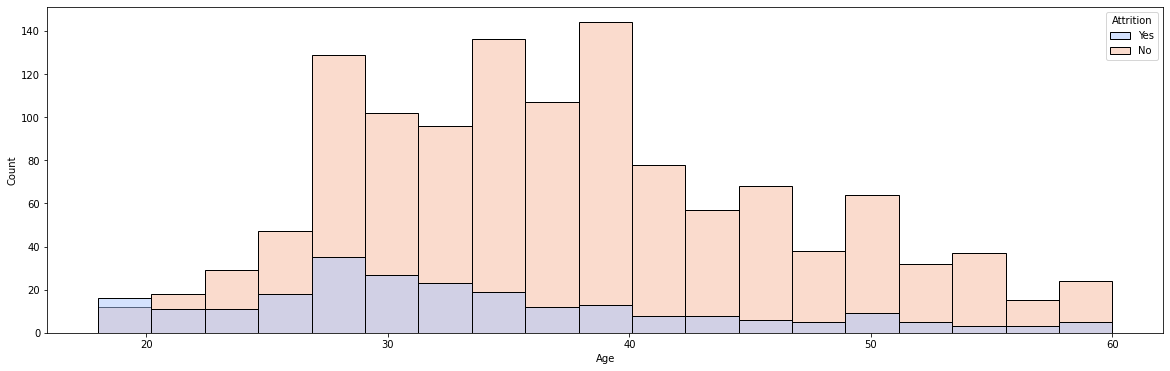

In [22]:
plt.figure(figsize=(20,6))
sns.histplot(data=df1,x='Age',palette='coolwarm',hue='Attrition')

El diagrama de frecuencia anterior muestra que la mayoria de los empleados de IBM tienen de 28 a 40 años. Se observa que todos los empleados que tienen menos de 20 años dejaron el trabajo, se evidencia que las personas jovenes son más propensas a dejar el trabajo, pues a partir de los 30 años de edad, la deserción empieza a disminuir.

#### -  Attrition

<AxesSubplot:title={'center':'Porcentaje de registros por attrition'}, ylabel='Attrition'>

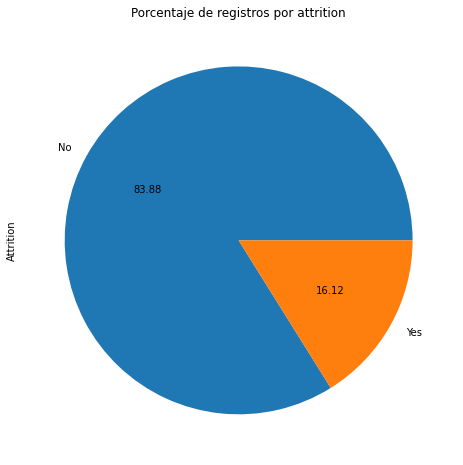

In [23]:
plt.figure(figsize=(8,8))
df1.groupby('Attrition')['Attrition'].count().plot(kind='pie',autopct='%.2f',title ="Porcentaje de registros por attrition")

Nos damos cuenta que tenemos un problema de desbalanceo de clases. La clase positiva se presenta muy pocas veces comparado a la clase negativa, por ende si se quiere construir un modelo predictivo se podria llegar a generar sesgo por la falta de información. Mas adelante justo antes de construir los modelos realizaremos el respectivo balanceo.

#### - Business Travel

<AxesSubplot:title={'center':'Porcentaje de registros por frecuencia de viaje'}, ylabel='BusinessTravel'>

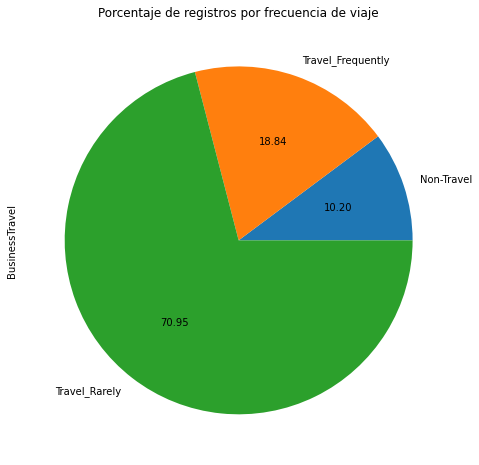

In [24]:
plt.figure(figsize=(8,8))
df1.groupby('BusinessTravel')['BusinessTravel'].count().plot(kind='pie',autopct='%.2f',title='Porcentaje de registros por frecuencia de viaje')

Del anterior gráfico se puede observar que el 70.95% de las personas viajan muy rara vez, el 18,84% viaja frecuentemente, mientras que el 10.2% no suele viajar.

##### -Department

,Department,Attrition,Cantidad
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


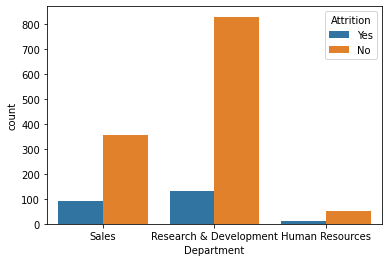

In [25]:
sns.countplot(data=df1, x='Department', hue="Attrition")
df1.groupby(['Department','Attrition']).size().reset_index(name='Cantidad')

Segun la tabla y grafica anterior se puede decir que el mayor numero de empleados que desertan o renuncian hacen parte del departamento de investigación y desarrollo y seguido de ellos los empleados de ventas.

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

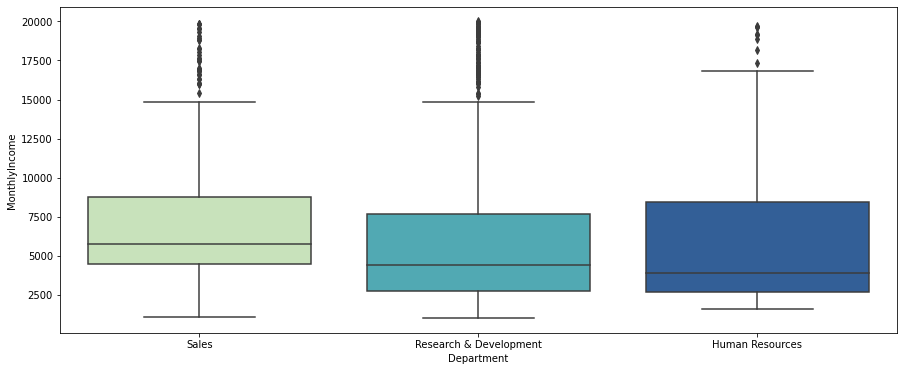

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df1, x='Department', y='MonthlyIncome', palette='YlGnBu')

Segun el anterior diagrama de caja y bigotes se puede decir que:
- El departamento de Recursos Humanos tiene en promedio el ingreso mensual mas bajo comparado con el departamento de ventas e Investigacion y desarollo.
- Las personas del departamento de ventas tienen el mayor ingreso mensual, se podria a llegar a pensar que es por tema de comisiones.
- El departamento de Investigación y Desarrollo tiene un numero importante de personas que tienen ingresos altos.

,Department,Gender,Cantidad
0,Human Resources,Female,20
1,Human Resources,Male,43
2,Research & Development,Female,379
3,Research & Development,Male,582
4,Sales,Female,189
5,Sales,Male,257


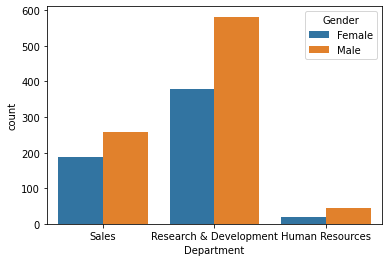

In [27]:
sns.countplot(data=df1, x='Department', hue="Gender")
df1.groupby(['Department','Gender']).size().reset_index(name='Cantidad')

De la anterior gráfica se observa que las mujeres predominan en todos los departamentos, especialmente en el de investigacipon y desarrollo

#### - Distance from Home

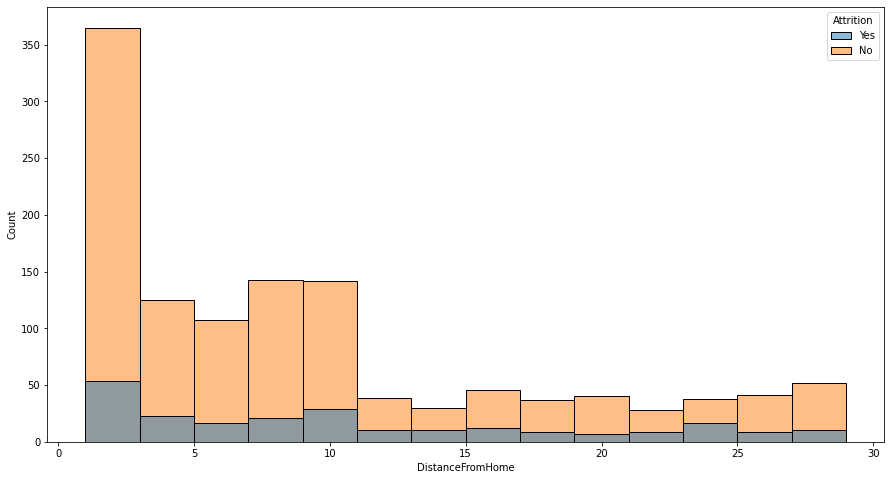

In [28]:
plt.figure(figsize=(15,8))
sns.histplot(x='DistanceFromHome',data=df1,hue='Attrition')
sns.set_palette("colorblind")
plt.show()

De la anterior gráfica se observa que la mayoria de personas viven cerca al trabajo. Sin embargo de las personas que dejan su trabajo, la mayoria vive a menos de 5 millas de este.

### - Education

<AxesSubplot:title={'center':'Porcentaje de registros por educación'}, ylabel='Education'>

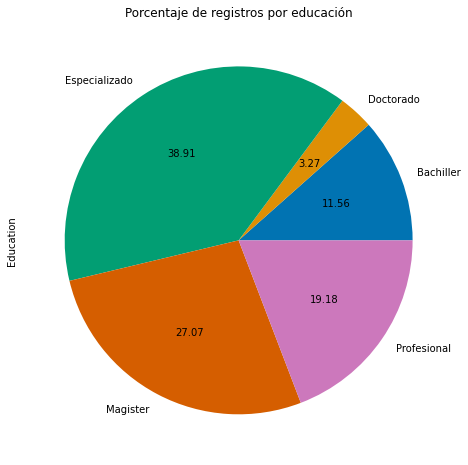

In [29]:
plt.figure(figsize=(8,8))
df1.groupby('Education')['Education'].count().plot(kind='pie',autopct='%.2f',title='Porcentaje de registros por educación')

De la anterior gráfica se observa que el 38% de las personas estan especializadas,27.07% tienen maestría, 3.27% doctorado, 11.56% son bachilleres y 19.18% tienen un pregradado. Se procede a analizar si el nivel de estudios influye en el salario mensual.

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

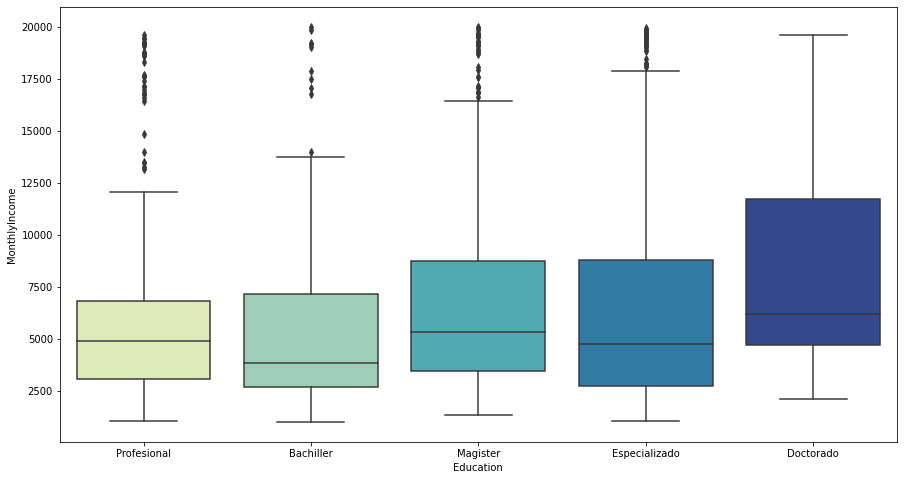

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1, x='Education', y='MonthlyIncome', palette='YlGnBu')

De la anterior gráfica se observa que en promedio, un mayor nivel de estudios refleja un mejor salario. Sin embargo, se observa que existen varios individuos que solamente con el pregrado o incluso solo con el bachillerato tienen salarios más altos que aquellos individuos que cuentan con estudios más avanzados.

#### -Education Field

Text(0, 0.5, '')

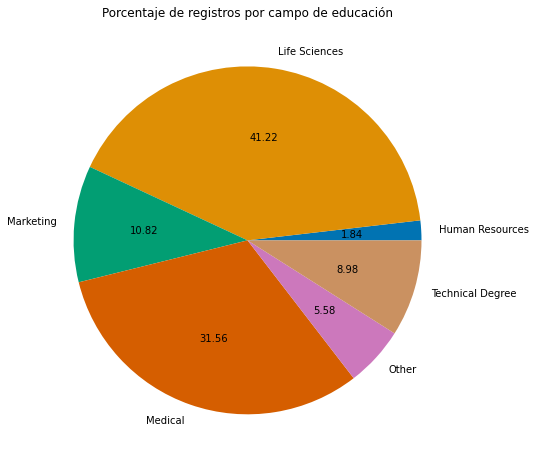

In [31]:
plt.figure(figsize=(8,8))
df1.groupby('EducationField')['EducationField'].count().plot(kind='pie',autopct='%.2f',title='Porcentaje de registros por campo de educación')
plt.ylabel('')

A partir de la anterior gráfica se puede observar el porcentaje de registros que existen en el data set por cada campo de educación. Se observa que el 41.22% de las personas tiene un estudio relacionado con el campo de life sciences.

<AxesSubplot:xlabel='EducationField', ylabel='MonthlyIncome'>

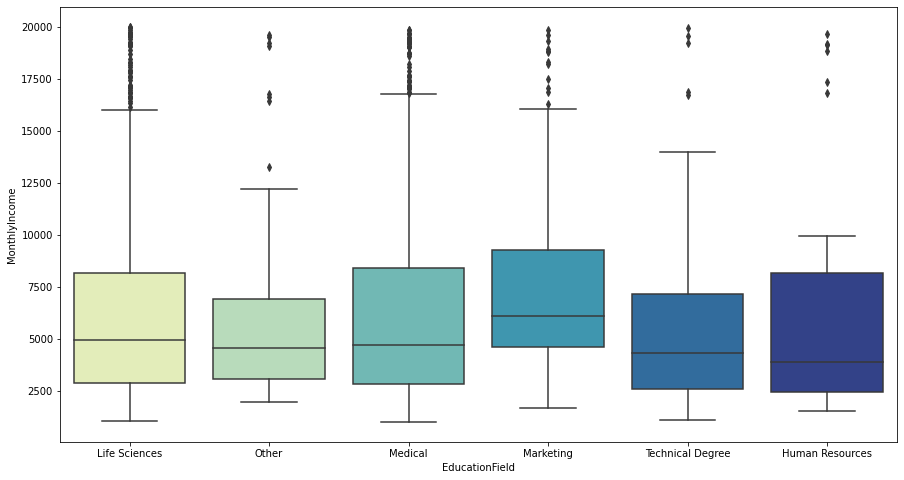

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1, x='EducationField', y='MonthlyIncome', palette='YlGnBu')

De la anterior gráfica se observa que en promedio, los profesionaes que tienen algún estudio en el campo del marketing tienen mejores salarios. Sin embargo hay algunas personas de otros campos de educación que tienen salarios muy altos.

#### - Environment Satisfaction

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

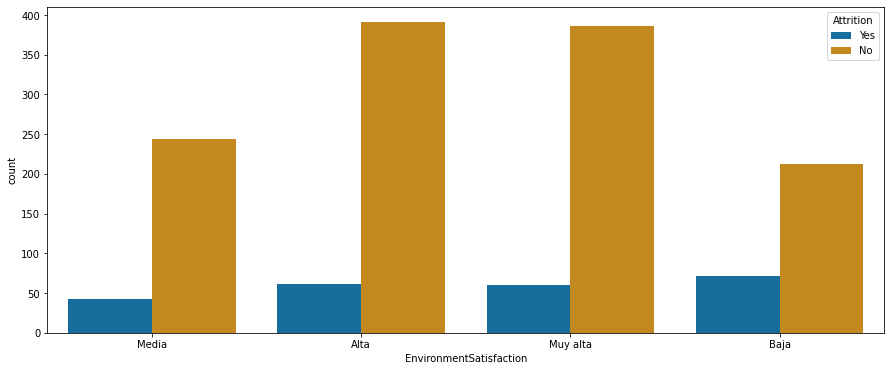

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(data=df1, x="EnvironmentSatisfaction", hue="Attrition")

De la anterior gráfica se observa que de los empleados que decidieron dejar el trabajo, la mayoria tenia una satisfcacción baja con la compañia, por tal motivo, es de vital importancia que el departamento de recursos humanos de IBM esuche las necesidades de aquellas personas que no se encuentran satisfechas, con el fin de mitigar la deserción laboral de estos individuos.

#### - Gender

,Gender,Cantidad
0,Female,588
1,Male,882


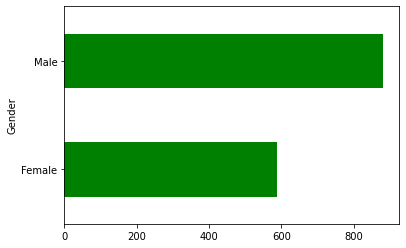

In [34]:
df1.groupby('Gender')['Gender'].count().plot(kind='barh', color='green')
df1.groupby(['Gender']).size().reset_index(name='Cantidad')

La informacion de Empleados de IBM nos dice que 40% son mujeres y el 60% hombres.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

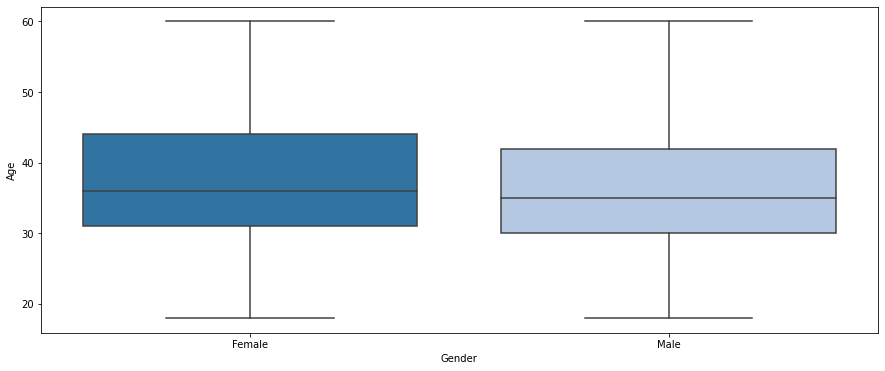

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df1, x='Gender', y='Age', palette='tab20')

Los hombres y mujeres de IBM en promedio tienen 35 años de edad.

,Attrition,Gender,Cantidad
0,No,Female,501
1,No,Male,732
2,Yes,Female,87
3,Yes,Male,150


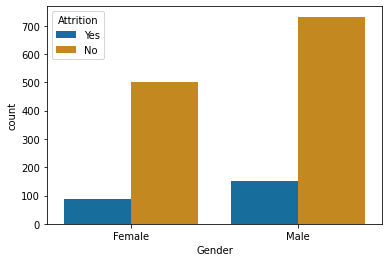

In [36]:
sns.countplot(data=df1, x='Gender', hue="Attrition")
df1.groupby(['Attrition','Gender']).size().reset_index(name='Cantidad')

Se observa que la mayoria de personas que dejaron su trabajo son hombres

#### - Job Role - Job Level

,Attrition,JobRole,Cantidad
0,No,Healthcare Representative,122
1,No,Human Resources,40
2,No,Laboratory Technician,197
3,No,Manager,97
4,No,Manufacturing Director,135
5,No,Research Director,78
6,No,Research Scientist,245
7,No,Sales Executive,269
8,No,Sales Representative,50
9,Yes,Healthcare Representative,9


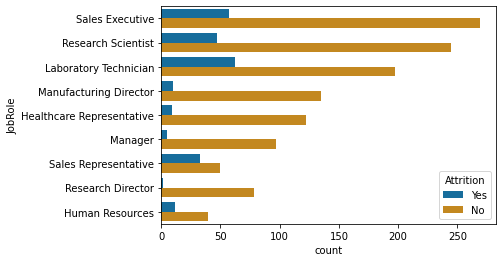

In [37]:
sns.countplot(data=df1, y='JobRole', hue="Attrition")
df1.groupby(['Attrition','JobRole']).size().reset_index(name='Cantidad')

Del diagrama de barras anterior se puede decir que:

- Los directores de investigacion y fabricacion, Gerentes y Representantes de atencion medica son los que menor tasa de desercion tienen.
- El mayor numero de personas que desertan del trabajo son tecnicos de laboratorio, representantes y ejecutivos de ventas e investigadores cientificos.

En pocas palabras se podria llegar a pensar que las personas con altos cargos en IBM no suelen desertar de su trabajo y con el siguiente diagrama se podria 'confirmar' ya que las personas que mas desertan son aquellas que tienen un trabajo de nivel "basico"

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

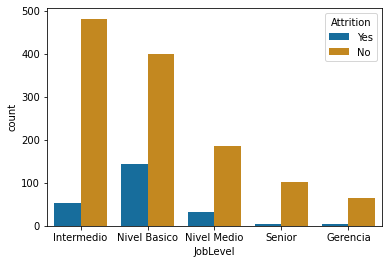

In [38]:
sns.countplot(data=df1, x='JobLevel', hue="Attrition")

,JobRole,Gender,Cantidad
0,Healthcare Representative,Female,51
1,Healthcare Representative,Male,80
2,Human Resources,Female,16
3,Human Resources,Male,36
4,Laboratory Technician,Female,85
5,Laboratory Technician,Male,174
6,Manager,Female,47
7,Manager,Male,55
8,Manufacturing Director,Female,72
9,Manufacturing Director,Male,73


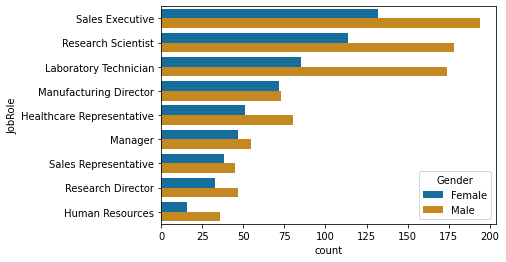

In [39]:
sns.countplot(data=df1, y='JobRole', hue="Gender")
df1.groupby(['JobRole','Gender']).size().reset_index(name='Cantidad')

De la anterior gráfica se observa que los hombres predominan en cantidad por cada rol de trabajo. Sin embargo en el rol de director de manufactura, la cantidad de mujeres es casi igual que la cantidad de hombres.

#### - Job Satisfaction

<AxesSubplot:ylabel='JobSatisfaction'>

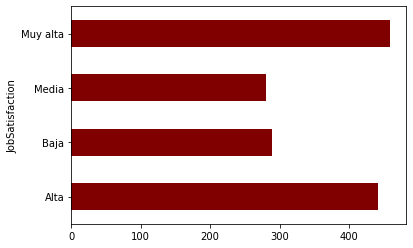

In [40]:
df1.groupby('JobSatisfaction')['JobSatisfaction'].count().plot(kind='barh', color='maroon')

La mayoria de personas estan realmente satisfechas con su trabajo pero tambien hay un numero importante de empleados que tienen una baja satisfaccion.

,Attrition,JobSatisfaction,Cantidad
0,No,Alta,369
1,No,Baja,223
2,No,Media,234
3,No,Muy alta,407
4,Yes,Alta,73
5,Yes,Baja,66
6,Yes,Media,46
7,Yes,Muy alta,52


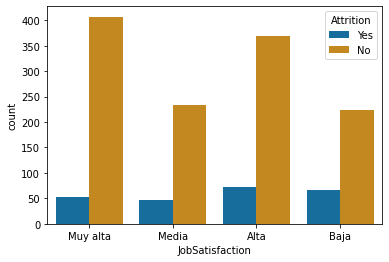

In [41]:
sns.countplot(data=df1, x='JobSatisfaction', hue="Attrition")
df1.groupby(['Attrition','JobSatisfaction']).size().reset_index(name='Cantidad')

Como era de esperarse los empleados que tienen una baja satisfaccion laboral en su mayoria desertan del trabajo. Pero viendo la cantidad de personas que desertan de otras categorias se genera la duda si realmente esta variable toma gran peso en la decision de desertar o no. Esta duda se resolvera mas adelante con los modelos que se van aplicar.

#### - Marital Status

Text(0, 0.5, '')

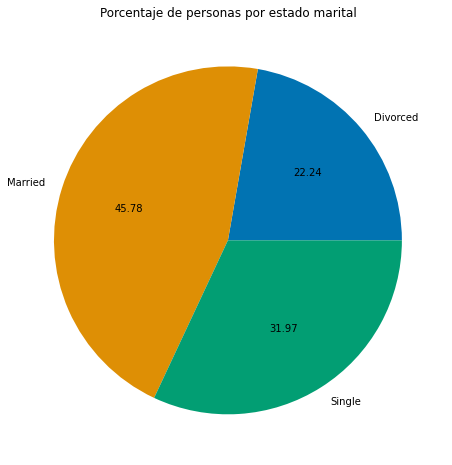

In [42]:
plt.figure(figsize=(8,8))
df1.groupby('MaritalStatus')['MaritalStatus'].count().plot(kind='pie',autopct='%.2f',title='Porcentaje de personas por estado marital')
plt.ylabel('')

De la anterior Gráfica se observa que el 45.78% de las personas estan casadas, el 31.97% están solteras y el 22.24% están divociadas.

<AxesSubplot:title={'center':'Porcentaje de personas que dejan su trabajo por estado marital'}, ylabel='MaritalStatus'>

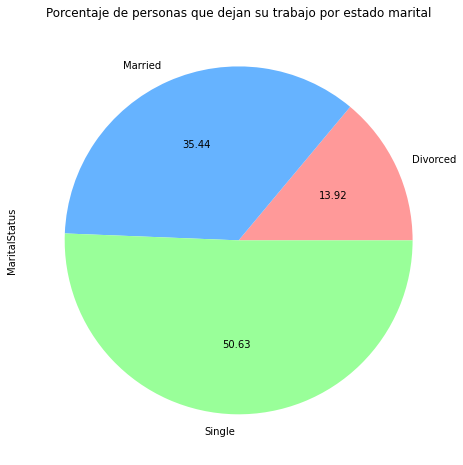

In [43]:
plt.figure(figsize=(8,8))
df1[df1.Attrition=='Yes'].groupby('MaritalStatus')['MaritalStatus'].count().plot(kind='pie',autopct='%.2f',title='Porcentaje de personas que dejan su trabajo por estado marital',colors=['#ff9999', '#66b3ff', '#99ff99'])


La anterior gráfica de torta muestra el estado marital de las personas que **si** dejaron su trabajo. Se observa que la mitad de las personas que dejaron su trabajo estaban solteras, mientras que el 35.44% de personas que dejaron su trabajo eran casadas y el 13.92% estaban divorciadas.

### Monthly Income

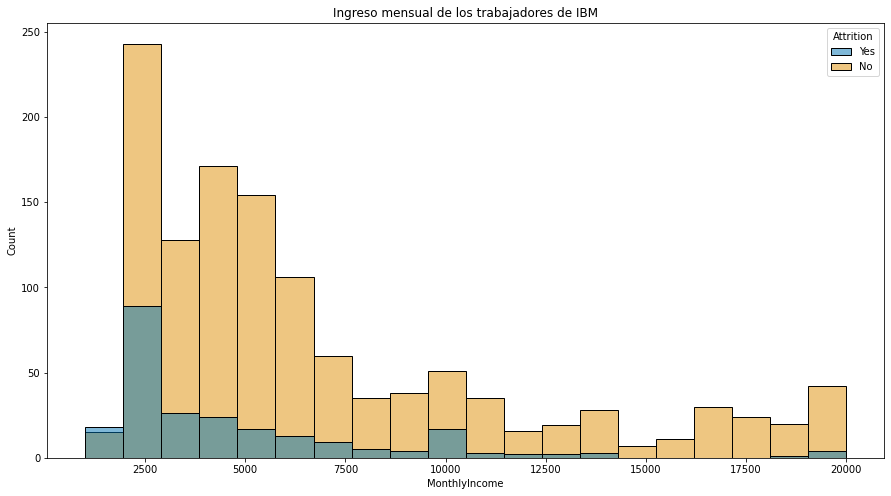

In [44]:
plt.figure(figsize=(15,8))
sns.histplot(x='MonthlyIncome',data=df1,hue='Attrition')
sns.set_palette("colorblind")
plt.title("Ingreso mensual de los trabajadores de IBM")
plt.show()

La mayoria de empleados de IBM tiene un ingreso mensual aprox de 2500 USD. Se observa que el 100% de los empleados que ganan menos de 2500 USD dejan su trabajo. A medida que el ingreso mensual aumenta, la tasa de deserción disminuye, por lo cual se puede pensar que el salario puede ser un factor de decisión en dejar o no el trabajo en IBM.

Text(0.5, 1.0, 'Ingreso mensual vs años de permanencia en el trabajo actual')

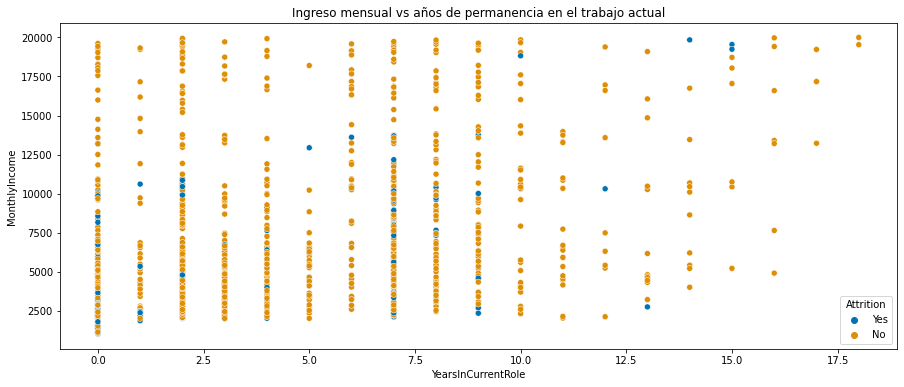

In [45]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df1, x="YearsInCurrentRole", y="MonthlyIncome", hue='Attrition')
plt.title('Ingreso mensual vs años de permanencia en el trabajo actual')

De la anterior gráfica no se observa ninguna relación entre el numero de años que lleva una persona en su trabajo actual y el ingreso. Sin embargo se observa que la mayoria de personas dejan su trabajo cuando llevan menos de un año en su trabajo actual y cuando llevan 7 años en su trabajo actual.

In [46]:
sy=df1['MonthlyIncome'][df1.Attrition=="Yes"].mean()
sn=df1['MonthlyIncome'][df1.Attrition=="No"].mean()
print("Promedio del salario mensual para las personas que dejaron su trabajo :", sy)
print("Promedio del salario mensual para las personas que no dejaron su trabajo :", sn)


Promedio del salario mensual para las personas que dejaron su trabajo : 4787.0928270042195
Promedio del salario mensual para las personas que no dejaron su trabajo : 6832.739659367397


A partir del calculo anterior se observa que el salario promedio de las personas que **si** dejaron su trabajo es menor que el salario promedio de las personas que no lo dejaron, por lo cual se podria pensar que el salario podría ser uno de los factores más relevantes para dejar o no el trabajo en IBM.

#### - Num Companies Worked

<AxesSubplot:xlabel='count', ylabel='NumCompaniesWorked'>

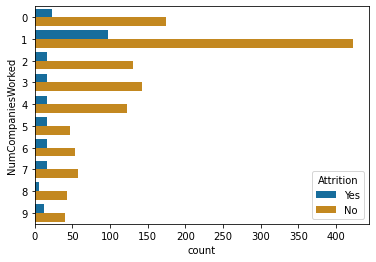

In [47]:
sns.countplot(data=df1, y='NumCompaniesWorked', hue="Attrition")

De la anterior gráfica se observa que a menor numero de empresas en las que el empleado ha trabajado, es más probable que deje su trabajo.

### - Performance Rating

<AxesSubplot:title={'center':'Porcentaje de personas que dejaron su trabajo por calificación de desempeño'}, ylabel='PerformanceRating'>

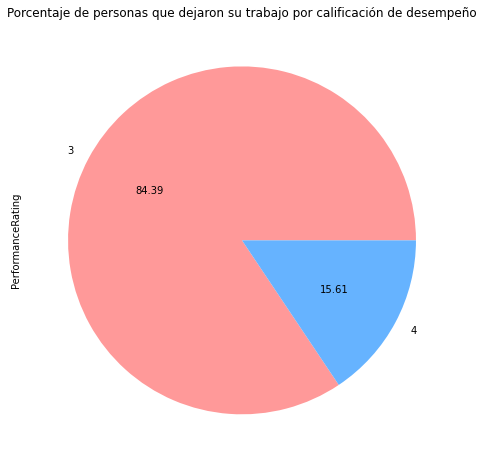

In [48]:
plt.figure(figsize=(8,8))
df1[df1.Attrition=='Yes'].groupby('PerformanceRating')['PerformanceRating'].count().plot(kind='pie',autopct='%.2f',title='Porcentaje de personas que dejaron su trabajo por calificación de desempeño',colors=['#ff9999', '#66b3ff', '#99ff99'])


De la anterior gráfica se observa que el 84.39% de las personas que si dejaron su trabajo obtuvieron una calificación de **3** en su desempeño. Se podria pensar que las personas que obtengan esta calificación son mas propensas a dejar su trabajo en IBM.

### - WorkLifeBalance

Se quiere mirar si de la variable 'Work Life Balance' se identifica algun comportamiento. Por ende se realiza la siguiente grafica.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

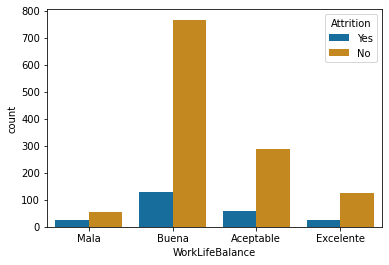

In [49]:
sns.countplot(data=df1, x='WorkLifeBalance', hue="Attrition")

Realmente no me brinda mucha información mas adelante cuando realicemos los modelos veremos si realmente esta variable toma gran peso o es importante en la clasificación.

### - Years at company

Text(0.5, 1.0, 'Ingreso mensual vs Años de servicio en la compañia')

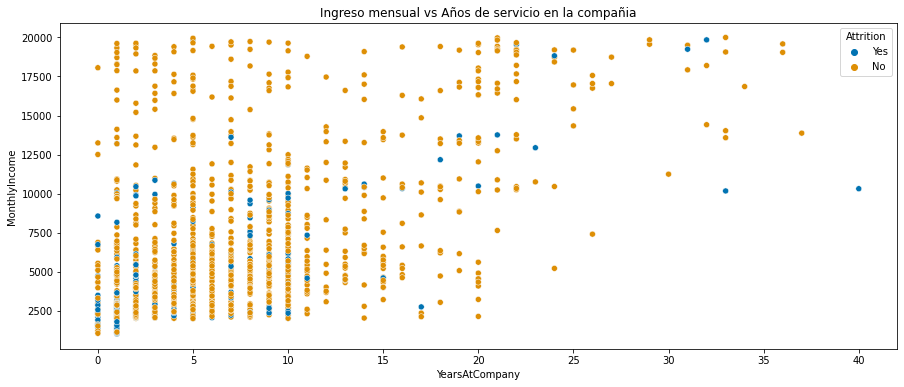

In [50]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df1, x="YearsAtCompany", y="MonthlyIncome", hue='Attrition')
plt.title('Ingreso mensual vs Años de servicio en la compañia')

De la anterior gráfica no se evidencia una relación existente entre los años de servicio para IBM y el salario mensual, se observa que el salario no depende del tiempo de permanencia en la compañía. Sin embargo se observa que personas que lleven menos de 10 años son mas propensas a dejar el trabajo que aquellas personas que llevan más de 10 años.

#### - Years In Current Role

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

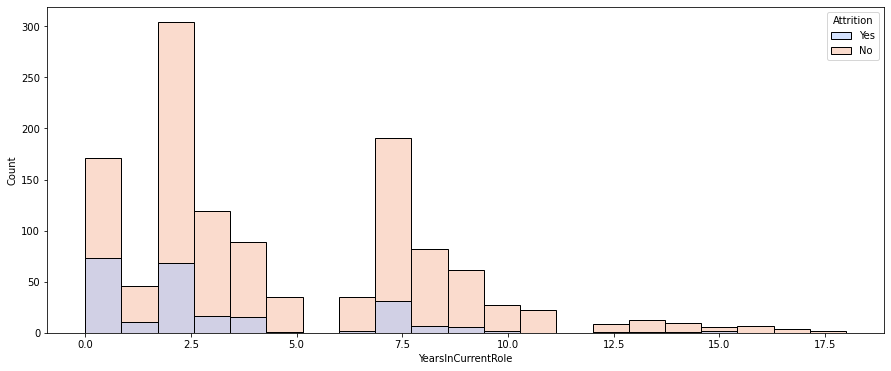

In [51]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1,x='YearsInCurrentRole',hue='Attrition',palette='coolwarm')

En general se observa que las personas no suelen ocupar el mismo cargo por mucho tiempo, máximo lo hacen por 2.5 años. Se evidencia que las personas que han durado en su mismo cargo por menos de 5 años, son más propensas a dejar su trabajo, incluso existe una mayor probabilidad de dejarlo cuando aún no se ha cumplido el año de permanencia en el cargo.

#### - Years With Current Manager

Text(0.5, 1.0, 'Años con el jefe actual')

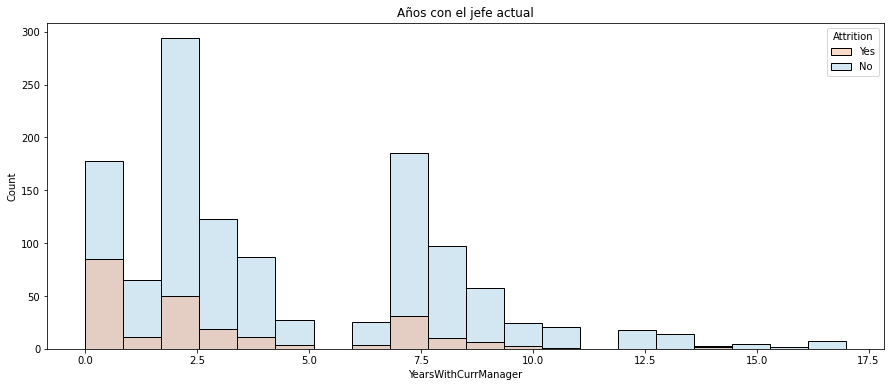

In [52]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1,x='YearsWithCurrManager',hue='Attrition',palette='RdBu')
plt.title('Años con el jefe actual')

Se observa que las personas en IBM no suelen tener el mismo jefe por mucho tiempo, sin embargo cuando el jefe actual lleva liderando el equipo por menos de un año, existe mayor probabildiad de que las personas de ese equipo dejen su trabajo.

##  3 . Preparación de los datos para los modelos

Dado que se tienen variables categoricas, se procede a usar el metodo *One Hot Encoding* y de esta manera tener todas las variables numericas sin alterar la información que nos pueden brindar.

In [53]:
atributos_categoricos=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobLevel','JobRole','JobSatisfaction','MaritalStatus','WorkLifeBalance']
for vector in atributos_categoricos:
    df1=pd.get_dummies(df1,columns=[vector],prefix=vector,prefix_sep='_',drop_first=True)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   DistanceFromHome                   1470 non-null   int64 
 3   EmployeeNumber                     1470 non-null   int64 
 4   MonthlyIncome                      1470 non-null   int64 
 5   NumCompaniesWorked                 1470 non-null   int64 
 6   PerformanceRating                  1470 non-null   int64 
 7   YearsAtCompany                     1470 non-null   int64 
 8   YearsInCurrentRole                 1470 non-null   int64 
 9   YearsWithCurrManager               1470 non-null   int64 
 10  BusinessTravel_Travel_Frequently   1470 non-null   uint8 
 11  BusinessTravel_Travel_Rarely       1470 non-null   uint8 
 12  Depart

In [55]:
df1.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'EmployeeNumber',
       'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'Education_Doctorado', 'Education_Especializado', 'Education_Magister',
       'Education_Profesional', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_Baja', 'EnvironmentSatisfaction_Media',
       'EnvironmentSatisfaction_Muy alta', 'Gender_Male',
       'JobLevel_Intermedio', 'JobLevel_Nivel Basico', 'JobLevel_Nivel Medio',
       'JobLevel_Senior', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director

Cuando se realizo el exploratorio de los datos nos dimos cuenta del desbalanceo de clases que se presenta lo cual puede generar sesgo en la construccion de los modelos, es por esta razon que se va a realizar *Upsampling*  a la clase minoritaria (replicas por muestreo)

In [56]:
dfP = df1[df1['Attrition'] == 'Yes']
dfN = df1[df1['Attrition'] == 'No']
dfP = resample(dfP,replace=True,n_samples=len(dfN),random_state=66)
dfb = pd.concat([dfP,dfN])

A continuación verificamos que el DataSet ya se encuentra balanceado.

In [57]:
dfb.groupby(['Attrition']).size().reset_index(name='Apariciones')

,Attrition,Apariciones
0,No,1233
1,Yes,1233


In [58]:
df1= df1.drop(['EmployeeNumber'], axis= 1)

In [59]:
dfb['Attrition'] = dfb['Attrition'].replace(['Yes','No'],[1,0])

Ahora partiremos el Data Set en dos; 70% para entrenar los modelos y el 30% restante para validar la precision del modelo y sacar metricas de su rendimiento.

In [60]:
X= dfb [['Age','DistanceFromHome',
       'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'Education_Doctorado', 'Education_Especializado', 'Education_Magister',
       'Education_Profesional', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_Baja', 'EnvironmentSatisfaction_Media',
       'EnvironmentSatisfaction_Muy alta', 'Gender_Male',
       'JobLevel_Intermedio', 'JobLevel_Nivel Basico', 'JobLevel_Nivel Medio',
       'JobLevel_Senior', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction_Baja',
       'JobSatisfaction_Media', 'JobSatisfaction_Muy alta',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'WorkLifeBalance_Buena', 'WorkLifeBalance_Excelente',
       'WorkLifeBalance_Mala']]
Y= dfb['Attrition']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.3, random_state = 334543)

Teniendo en cuenta el contexto de los datos, se pretende construir el mejor modelo que permita predecir cuando un empleado de IBM va a renunciar o desertar de su trabajo, mas adelante veremos como esto se alina con la necesidad del negocio.

### Modelos Predictivos

# Primer modelo de clasificación - Decision Tree Classifier

El primer modelo que se va a construir es Decision Tree Classifier. 

In [61]:
from sklearn.tree import DecisionTreeClassifier

Se decide construir dos arboles de clasificación el primero *(arbolE)* el cual se construye con el criterio de **Entropia** y el segundo se va a construir bajo el criterio **Gini** *(ArbolG)*. Estos dos criterios son dos formas diferentes de calcular la ganancia de información de cada variable, por ende de definir los niveles del arbol. El objetivo es identificar para este conjunto de datos bajo que criterio se construye el mejor arbol de decision.

La entropia y el Gini se pueden entender como el ruido o la impureza de los datos, hiperparametro que se tiene en cuenta en la construccion de los modelos para ver cual nos genera una mejor clasificacion o prediccion.

In [62]:
arbolE = DecisionTreeClassifier(criterion = 'entropy',random_state=16)
arbolE = arbolE.fit(Xtrain,Ytrain)

In [63]:
arbolG = DecisionTreeClassifier(criterion = 'gini',random_state=16)
arbolG = arbolG.fit(Xtrain,Ytrain)

Para ver el rendimiento de los dos arboles construidos anteriormente se decide hacer la matriz de confusion de cada uno para ver las predicciones correctas de la clase negativa y positiva. Y a partir de esta matriz calcular metricas tales como la precision, exactitud, sensibilidad y espeficidad.

### Matriz de confusion - Decision Tree Classifier *(Entropia)*. 

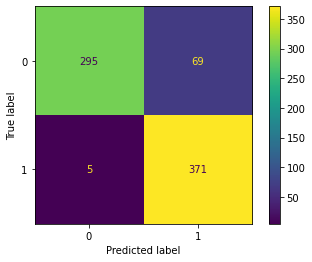

In [64]:
plot_confusion_matrix(arbolE, Xtest, Ytest)
plt.show()

#### Metricas

In [65]:
Edte= (371+295)/740
Pdte= 371/(371+69)
Sdte= 371/(371+5)
Esdte= 295/(295+69)
print ('Exactitud:',Edte) 
print ('Precision:',Pdte)
print ('Sensibilidad:',Sdte)
print('Especificidad:',Esdte)

Exactitud: 0.9
Precision: 0.8431818181818181
Sensibilidad: 0.9867021276595744
Especificidad: 0.8104395604395604


In [66]:
Y_prediccion = arbolE.predict(Xtest)
dtAUC, dttAUC, umbral = metrics.roc_curve(Ytest, Y_prediccion)
AUCdte= metrics.auc(dtAUC,dttAUC)
print('AUC:', AUCdte)

AUC: 0.8985708440495674


Text(0, 0.5, 'Tasa de verdaderos positivos')

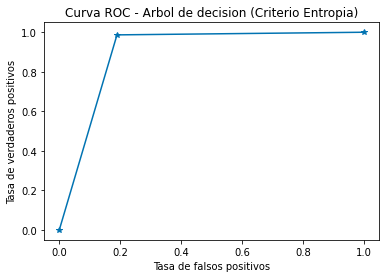

In [67]:
pyplot.plot(dtAUC,dttAUC, marker='*', label='Curva ROC - Arbol de decision (Entropia)')
pyplot.title('Curva ROC - Arbol de decision (Criterio Entropia)')
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')

### Matriz de confusion - Decision Tree *(Gini)*.

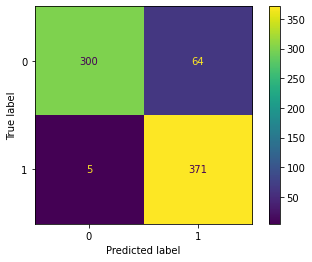

In [68]:
plot_confusion_matrix(arbolG, Xtest, Ytest)
plt.show()

In [69]:
Edtg = (371+300)/740
Pdtg = 371/(371+64)
Sdtg = 371/(371+5)
Esdtg = 300/(300+64)
print ('Exactitud:',Edtg) 
print ('Precision:',Pdtg)
print ('Sensibilidad:',Sdtg)
print('Especificidad:',Esdtg)

Exactitud: 0.9067567567567567
Precision: 0.8528735632183908
Sensibilidad: 0.9867021276595744
Especificidad: 0.8241758241758241


In [70]:
Y_prediccion = arbolG.predict(Xtest)
dtAUC, dttAUC, umbral = metrics.roc_curve(Ytest, Y_prediccion)
AUCdtg= metrics.auc(dtAUC,dttAUC)
print('AUC:',AUCdtg)

AUC: 0.9054389759176993


Text(0, 0.5, 'Tasa de verdaderos positivos')

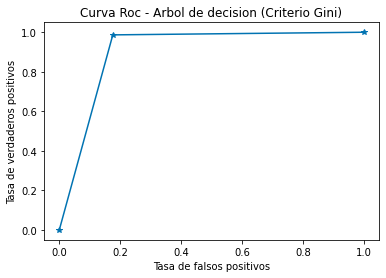

In [71]:
pyplot.plot(dtAUC,dttAUC, marker='*')
pyplot.title('Curva Roc - Arbol de decision (Criterio Gini)')
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')

# Segundo modelo de clasificación - Random Forest Classifier

In [72]:
Numero_Arboles= [30,60,90,120,150,180,210,240]
arboles=[]
for i in Numero_Arboles :
    Numero_de_arboles = i
    bosque=RandomForestClassifier(n_estimators=Numero_de_arboles, random_state=567675)
    bosque.fit(Xtrain,Ytrain)
    arboles.append(bosque)

In [73]:
prec = []
for i in arboles :    
    Ypred = i.predict(Xtest)
    prec.append(metrics.accuracy_score(Ytest, Ypred))
tabla = pd.DataFrame(prec , index= ['30 arboles', '60 arboles', '90 arboles', '120 arboles', '150 arboles', '180 arboles', '210 arboles', '240 arboles'], columns =['Exactitud'])
tabla

,Exactitud
30 arboles,0.956757
60 arboles,0.956757
90 arboles,0.963514
120 arboles,0.960811
150 arboles,0.962162
180 arboles,0.960811
210 arboles,0.960811
240 arboles,0.960811


Se realiza la construccion de varios random forest cambiando el numero de arboles y calculando su exactitud para asi seleccionar el que tenga un mejor rendimiento al momento de clasificar.

Segun lo anterior se decide trabajar con el Random Forest Classifier que se contruye con 60 arboles. Por ende se procede a construir su matriz de confusión.

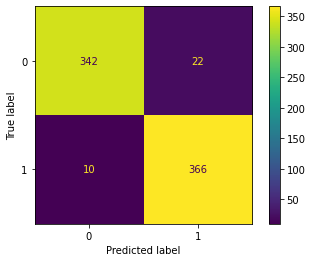

In [74]:
plot_confusion_matrix(arboles[1], Xtest, Ytest)
plt.show()

In [75]:
Erf = (366+342)/(740)
Prf= 366/(366+22)
Srf= 366/(366+10)
Esrf= 342/(342+22)
print ('Exactitud:',Erf) 
print ('Precision:',Prf)
print ('Sensibilidad:',Srf)
print('Especificidad:',Esrf)

Exactitud: 0.9567567567567568
Precision: 0.9432989690721649
Sensibilidad: 0.973404255319149
Especificidad: 0.9395604395604396


In [76]:
Y_prediccion = arboles[1].predict(Xtest)
dtAUC, dttAUC, umbral = metrics.roc_curve(Ytest, Y_prediccion)
AUCrf= metrics.auc(dtAUC,dttAUC)
print('AUC:',AUCrf)

AUC: 0.9564823474397942


Text(0, 0.5, 'Tasa de verdaderos positivos')

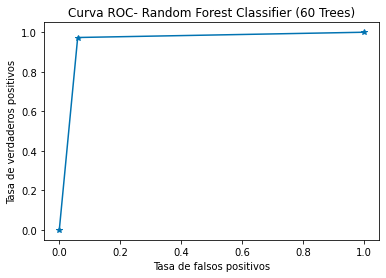

In [77]:
pyplot.plot(dtAUC,dttAUC, marker='*')
pyplot.title('Curva ROC- Random Forest Classifier (60 Trees)')
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')

Random forest con 60 arboles es el mejor modelo comparado con decision tree bajo el criterio Entropia y Gini. El area bajo la curva ROC es mayor y es debido a que genera una mejor prediccion de la clase negativa, es decir se reduce la tasa de falsos positivos. Respecto a la prediccion de la clase positiva el comportamiento si es muy similar a decision tree bajo el criterio Gini.

# Tercer modelo de clasificacion - Boosting Classifier  

Boosting es un método utilizado en machine learning para reducir los errores en el análisis predictivo de datos y esto lo logra por medio de la construccion del mismo modelo de prediccion varias veces y en secuencia, el segundo modelo aprende del primero y asi sucesivamente para logar aumentar la exactitud de la prediccion. 

Para esto se utilizo el algoritmo Boosting Adaptativo (AdaBoost) el cual se hizo tomando como base *Decision Tree Classifier* con una profundidad de arbol de 1 y con 500 iteraciones. Se lograron definir estos parametros ya que se variarion aleatoriamente y estos dos dieron las mejores metricas las cuales se mostraran mas adelante.

Se podria llegar a pensar que aumentar la profundiad del arbol y el numero de iteraciones va a lograr un mejor rendimiento del modelo y es verdad, pero al tener un rendimiento del modelo tan alto, cercano al 100% se puede pensar que se tiene un problema de overfitting o sobre ajuste, lo cual al ingresar nuevos datos al modelo sus metricas de prediccion caeran rotundamente.

In [78]:
base= DecisionTreeClassifier(max_depth=1, random_state=1)
BT = AdaBoostClassifier(base_estimator=base, n_estimators=400, random_state=1)
BT.fit(Xtrain, Ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   n_estimators=400, random_state=1)

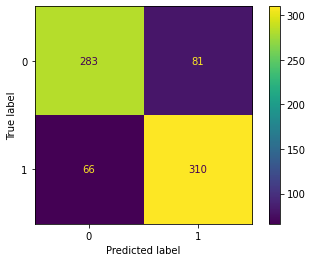

In [79]:
plot_confusion_matrix(BT, Xtest, Ytest)
plt.show()

In [80]:
Eb= (310+283)/740
Pb= 310/(310+81)
Sb= 310/(310+66)
Esb= 283/(283+81)
print ('Exactitud:',Eb) 
print ('Precision:',Pb)
print ('Sensibilidad:',Sb)
print('Especificidad:',Esb)

Exactitud: 0.8013513513513514
Precision: 0.7928388746803069
Sensibilidad: 0.824468085106383
Especificidad: 0.7774725274725275


In [81]:
Y_prediccion = BT.predict(Xtest)
dtAUC, dttAUC, umbral = metrics.roc_curve(Ytest, Y_prediccion)
AUCb= metrics.auc(dtAUC,dttAUC)
print('AUC:', AUCb)

AUC: 0.8009703062894553


Text(0, 0.5, 'Tasa de verdaderos positivos')

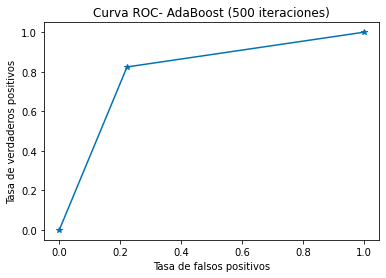

In [82]:
pyplot.plot(dtAUC,dttAUC, marker='*')
pyplot.title('Curva ROC- AdaBoost (500 iteraciones)')
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')

# Cuarto modelo - Regresion Logistica

Se construira un modelo de regresion logistica para predecir la probabilidad de que las personas deserten o renuncien de su trabajo, seguido de esto se realizara la clasificación con un punto de corte y se realizaran todas las metricas de la matriz de confusion.

In [83]:
import statsmodels.api as sm
RL= sm.Logit(endog=Ytrain, exog=Xtrain,)
RL= RL.fit()
print(RL.summary())

Optimization terminated successfully.
         Current function value: 0.488805
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1726
Model:                          Logit   Df Residuals:                     1681
Method:                           MLE   Df Model:                           44
Date:                Wed, 17 May 2023   Pseudo R-squ.:                  0.2948
Time:                        21:30:34   Log-Likelihood:                -843.68
converged:                       True   LL-Null:                       -1196.3
Covariance Type:            nonrobust   LLR p-value:                4.543e-120
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0344      0.009     -3

Segun la tabla anterior se puede concluir que con un nivel de significancia del 5% se rechaza la hipotesis nula, es decir el modelo **SI** funciona para predecir la probabilidad de la clase positiva. 

No se mira el R cuadrado, no me brinda información ya que se estan prediciendo probabilidades de una clase binaria.

Adicional mirando el coeficiente (coef) en la segunda tabla podemos decir que: 

- Hay una relacion directa de la variable "distancia de la casa al trabajo", quiere decir que a mayor distancia de la casa al trabajo es mas probable que ese empleado renuncie de IBM. Se entiende que dicha variable es un factor por el cual los empleados pueden desertar.

- Las personas que trabajan en el departamento de investigación y desarrollo y en el departamento de ventas son mas propensas a que deserten de su trabajo, existe una relacion directa.

- Los ejecutivos de ventas y representantes de ventas tienen una alta relacion directa con la clase positiva, es decir son roles donde la gente es muy propensa a renunciar.

In [84]:
Y_prediccion = RL.predict(exog = Xtest)

Luego de que el modelo predijiera las probabilidades de pertenecer a la clase positiva se debe escoger un punto de corte para definir apartir de que valor de probabilidad se va a decir que el empleado SI va a desistir de su trabajo.

Para encontrar el punto de corte mas optimo se calculo la *exactitud* con varios puntos de corte y asi poder ver cual de todos nos generaba un mejor rendimiento.

In [85]:
def clas0(prob):
    if prob < 0.4:
        return 0
    else:
        return 1
def clas1(prob):
    if prob < 0.5:
        return 0
    else:
        return 1
def clas2(prob):
    if prob < 0.6:
        return 0
    else:
        return 1
def clas3(prob):
    if prob < 0.7:
        return 0
    else:
        return 1
def clas4(prob):
    if prob < 0.8:
        return 0
    else:
        return 1
def clas5(prob):
    if prob < 0.9:
        return 0
    else:
        return 1

In [86]:
Y_prediccion_0=Y_prediccion.apply(clas0)
Y_prediccion_1=Y_prediccion.apply(clas1)
Y_prediccion_2=Y_prediccion.apply(clas2)
Y_prediccion_3=Y_prediccion.apply(clas3)
Y_prediccion_4=Y_prediccion.apply(clas4)
Y_prediccion_5=Y_prediccion.apply(clas5)

In [87]:
print('Exactitud corte 0,4:',metrics.accuracy_score(Ytest,Y_prediccion_0))
print('Exactitud corte 0,5:',metrics.accuracy_score(Ytest,Y_prediccion_1))
print('Exactitud corte 0,6:',metrics.accuracy_score(Ytest,Y_prediccion_2))
print('Exactitud corte 0,7:',metrics.accuracy_score(Ytest,Y_prediccion_3))
print('Exactitud corte 0,8:',metrics.accuracy_score(Ytest,Y_prediccion_4))
print('Exactitud corte 0,9:',metrics.accuracy_score(Ytest,Y_prediccion_5))

Exactitud corte 0,4: 0.7162162162162162
Exactitud corte 0,5: 0.7243243243243244
Exactitud corte 0,6: 0.7256756756756757
Exactitud corte 0,7: 0.6932432432432433
Exactitud corte 0,8: 0.65
Exactitud corte 0,9: 0.5783783783783784


Como podemos observar el punto de corte que nos genera una mayor exactitud y por ende una mayor area bajo la curva ROC es el punto de corte de 0.6 Esto quiere decir que todo registro que el modelo haya predicho con una probabilidad por encima de 0.6 se toma como clase positiva.

Con base a lo anterior se procede a calcular todas las metricas de la matriz de confusion.

In [88]:
Erl = metrics.accuracy_score(Ytest,Y_prediccion_2)
Srl = metrics.recall_score(Ytest, Y_prediccion_2)
Prl = metrics.precision_score(Ytest, Y_prediccion_2)
print('Exactitud:',Erl)
print('Sensibilidad:',Srl)
print('Precision:',Prl)

Exactitud: 0.7256756756756757
Sensibilidad: 0.6675531914893617
Precision: 0.7629179331306991


In [89]:
dtAUC, dttAUC, umbral = metrics.roc_curve(Ytest, Y_prediccion_2)
AUCrl= metrics.auc(dtAUC,dttAUC)
print('AUC:', AUCrl)

AUC: 0.7266337386018237


Text(0, 0.5, 'Tasa de verdaderos positivos')

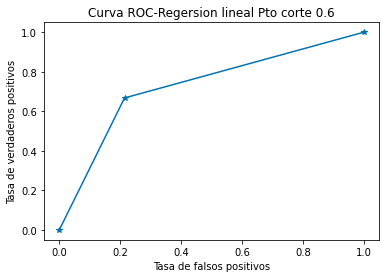

In [90]:
pyplot.plot(dtAUC,dttAUC, marker='*')
pyplot.title('Curva ROC-Regersion lineal Pto corte 0.6')
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')

# Quinto Modelo- Red Neuronal

Teniendo en cuenta que para construir una red neuronal se necesitan diferentes parametros, se procede a utilizar el atributo GridSearchCV de la libreria scikit-learn con el fin de encontrar los mejores parametros que optimizan el accurracy.

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    }
clf = MLPClassifier()
grid_search = GridSearchCV(clf, param_grid,)
grid_search.fit(Xtrain, Ytrain)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (10,), 'solver': 'adam'}


Se procede a construir y entrenar el modelo con los parametros sugeridos anteriormente. Posteriormente se realiza una predicción sobre este modelo:

In [93]:
clf = MLPClassifier(activation='relu',hidden_layer_sizes= (50,), solver= 'adam')
clf.fit(Xtrain, Ytrain)
Y_pred = clf.predict(Xtest)

A continuación se muestra la matriz de confusión para este modelo:

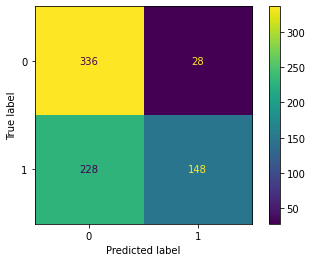

In [94]:
plot_confusion_matrix(clf, Xtest, Ytest)

In [95]:
RNEb= (244+276)/740
RNPb= 276/(276+120)
RNSb= 276/(276+100)
RNEsb= 244/(244+120)
print ('Exactitud:',RNEb) 
print ('Precision:',RNPb)
print ('Sensibilidad:',RNSb)
print('Especificidad:',RNEsb)

Exactitud: 0.7027027027027027
Precision: 0.696969696969697
Sensibilidad: 0.7340425531914894
Especificidad: 0.6703296703296703


In [96]:
rndAUC, rntAUC, umbral = metrics.roc_curve(Ytest, Y_pred)
AUCrn= metrics.auc(rndAUC,rntAUC)
print('AUC:', AUCrn)

AUC: 0.6583469721767594


Text(0, 0.5, 'Tasa de verdaderos positivos')

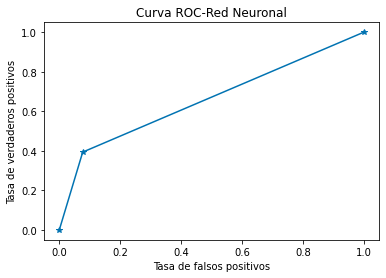

In [97]:
pyplot.plot(rndAUC,rntAUC, marker='*')
pyplot.title('Curva ROC-Red Neuronal')
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')

# Resumen de metricas  

Se realiza una tabla de resumen donde se pueden comparar facilmente las metricas de los diferentes modelos construidos anteriormente.

In [98]:
Metricas1={'DT Entropy':[Edte,Pdte,Sdte,Esdte,AUCdte],'DT Gini':[Edtg,Pdtg,Sdtg,Esdtg,AUCdtg],'Random Forest':[Erf,Prf,Srf,Esrf,AUCrf],'Ada Boost':[Eb,Pb,Sb,Esb,AUCb],'R Lineal pto corte 0.6':[Erl,Prl,Srl,'',AUCrl],'Red Neuronal':[RNEb,RNPb,RNSb,RNEsb,AUCrn]}
Metricas=pd.DataFrame(Metricas1, index=['Exactitud', 'Precision','Sensibilidad','Especificidad','AUC'])
Metricas

,DT Entropy,DT Gini,Random Forest,Ada Boost,R Lineal pto corte 0.6,Red Neuronal
Exactitud,0.900000,0.906757,0.956757,0.801351,0.725676,0.702703
Precision,0.843182,0.852874,0.943299,0.792839,0.762918,0.696970
Sensibilidad,0.986702,0.986702,0.973404,0.824468,0.667553,0.734043
Especificidad,0.810440,0.824176,0.939560,0.777473,,0.670330
AUC,0.898571,0.905439,0.956482,0.800970,0.726634,0.658347


Como se menciono al inicio del cuadernillo el objetivo es predecir los empleados de IBM que van a desertar o renunciar de su trabajo y para esto se realizo la construcción de 5 diferentes modelos. 

Teniendo en cuenta el objetivo planteado, nos vamos a enfocar en la metrica llamada **"Sensibilidad"** ya que esta me dice cual es el rendimiento del modelo prediciendo la clase positiva la cual es la de interes, en otras palabras me dice que tan bueno es el modelo prediciendo cuando un empleado si va a desertar.

Sin embargo tambien es importante ver la exactitud la cual me permite ver el rendimiento del modelo de manera general, es decir que tan bueno es el modelo para predecir cuando un empleado de IBM va o no a renunciar.

Importante tambien ver el valor del AUC (*Area bajo la curva ROC*) un valor AUC alto se traduce a una tasa de verdaderos positivos alta y una tasa de falsos positivos muy baja. 

Segun lo mencionado anteriormente y mirando la tabla resumen de las metricas de los diferentes modelos realizados se puede concluir que:

**- Decision Tree (criterio Entropia):** Realiza una excelente prediccion de las clases, ya que presenta un valor alto en su exactitud pero si miramos el 98,6% en su sensibilidad podriamos a llegar a pensar que este modelo tiene un problema de sobreajuste lo que quiere decir que se ajusta muy bien a los datos con los que se entreno pero su rendimiento muy probablemente caiga rotundamente al ingresar nuevos registros. 

**- Decision Tree (criterio Gini):** Se presenta algo muy similar al modelo anterior, la sensibilidad es del 98,6% es algo sospechoso, se puede pensar en un problema de sobreajuste.

**- Random Forest:** De los modelos construidos es el que tiene metricas mas altas con una exactitud de 95,6%, sensibilidad del 97% y AUC de 0.95. Son unas metricas realmente muy buenas pero sospechosas, de igual manera se podria pensar en un problema de overrfitting o sobre ajuste.

**- Regresion Logistica:** Se realizo un modelo de regresion logistica y luego se definio el punto de corte para realizar la clasificación de la clase y esto nos dio unas metricas no muy buenas; 66% de sensibilidad, exactitud y AUC de 0.72.

**- Red Neuronal:** Se observa que a partir de la red neuronal planteada, no se logran buenas metricas, pues la sensibilidad es de tan solo de 73.4%, la exactitud es del 70.2% y AUC de 69.6%

**- Ada Boost:** Este modelo nos da unas buenas metricas; exactitud del 80%, AUC de 0.8 y una sensibilidad de 82,4% lo que quiere decir que el modelo tiene un rendimiento para predecir la clase positiva del 82,4% y que ademas prediciendo tanto la clase positiva como negativa tiene un rendimiento del 80%. Es por esta razon que se elige este modelo como el mejor clasificador para predecir cuando un empleado de IBM va a desertar o no de su trabajo.

# Atributos o variables mas importantes

Conociendo el modelo que se va a manejar se pretende ver que variables fueron las mas importantes para su entrenamiento o aprendizaje automatico, por ende se listan en orden ascendente en la sigiuente tabla:

In [99]:
importancia=pd.DataFrame()
importancia['Atributos']=Xtrain.columns
importancia['Importancia']=BT.feature_importances_
importancia.sort_values("Importancia",ascending=False)

,Atributos,Importancia
2,MonthlyIncome,0.4650
0,Age,0.1475
5,YearsAtCompany,0.0825
7,YearsWithCurrManager,0.0525
6,YearsInCurrentRole,0.0500
3,NumCompaniesWorked,0.0275
1,DistanceFromHome,0.0225
8,BusinessTravel_Travel_Frequently,0.0200
41,MaritalStatus_Single,0.0125
9,BusinessTravel_Travel_Rarely,0.0125


Una vez conocidas las variables más importantes para el clasificador, se procede a examinar la relacion de dichas variables con la clase de interes que es la positiva, esto con el objetivo de identificar cuales son las caracteristicas de las personas más propensas a renunciar o desertar de su trabajo.

A continuación se puede observar que los empleados que ganan entre 1000 USD y 2500 USD mensuales son los más propensos a desertar de su trabajo

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

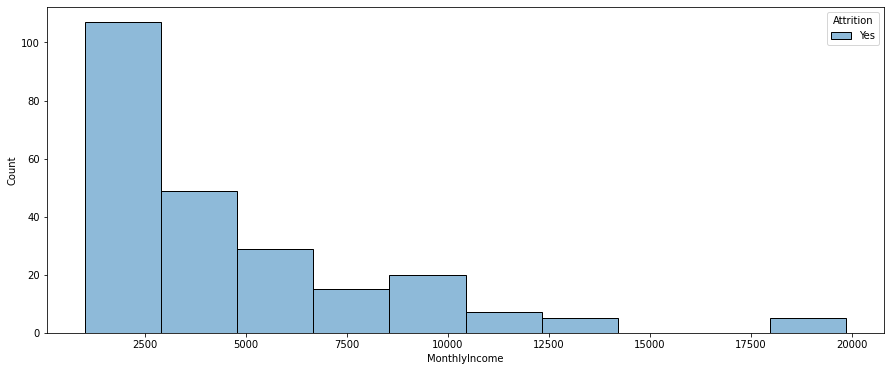

In [113]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1[df1['Attrition']=='Yes'],x='MonthlyIncome',palette='tab20',hue='Attrition',bins=10)

Del siguiente histograma se puede decir que los empleados que tienen de 27 a 32 años son los más propensos a renunciar de su trabajo.

<AxesSubplot:xlabel='Age', ylabel='Count'>

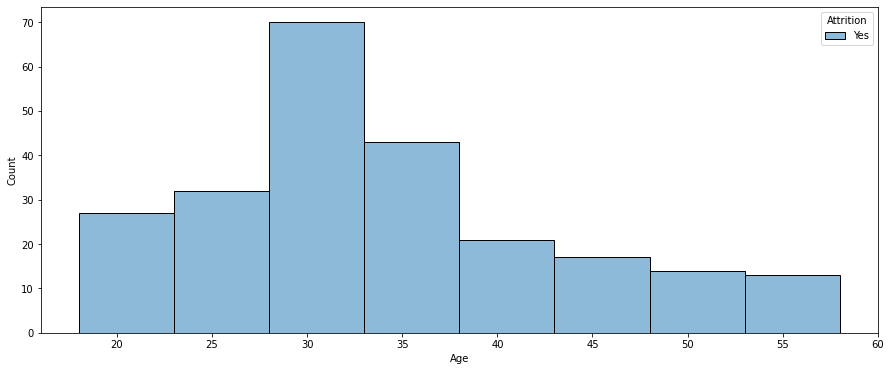

In [114]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1[df1['Attrition']=='Yes'],x='Age',palette='tab20',hue='Attrition',bins=8)

Respecto a la variable "Años en la compañia" se puede decir que los empleados que llevan menos años (entre 0 y 5) son los más probables que renuncien.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

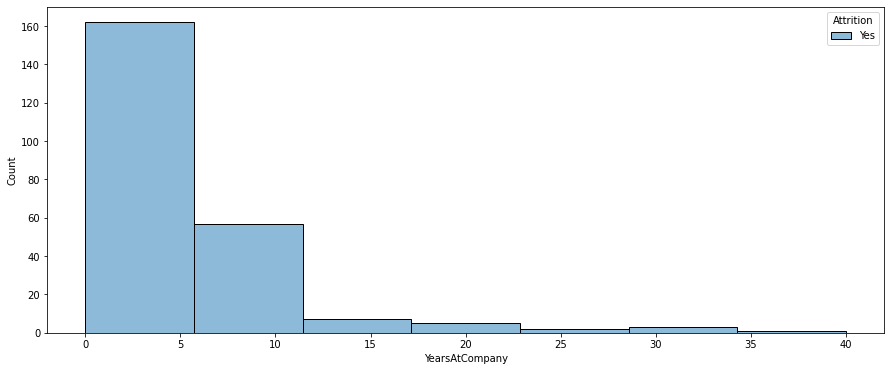

In [119]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1[df1['Attrition']=='Yes'],x='YearsAtCompany',palette='tab20',hue='Attrition',bins=7)

Los empleados que llevan de 0 a 4 años con el gerente actual de IBM suelen renunciar de su puesto de trabajo. Se podria llegar a pensar que los que llevan mas tiempo bajo el mando del gerente actual ya se acomodaron a sus politicas y por eso no desertan.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

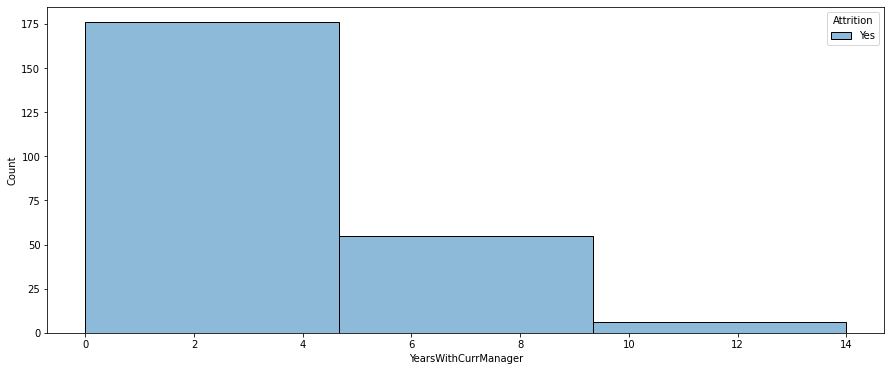

In [120]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1[df1['Attrition']=='Yes'],x='YearsWithCurrManager',palette='tab20',hue='Attrition',bins=3)

Segun el siguiente histograma se puede pensar que las personas que llevan pocos años en su rol actual (de 0 a 2 años) no logran adaptarse y por ende toman la decision de renunciar.

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

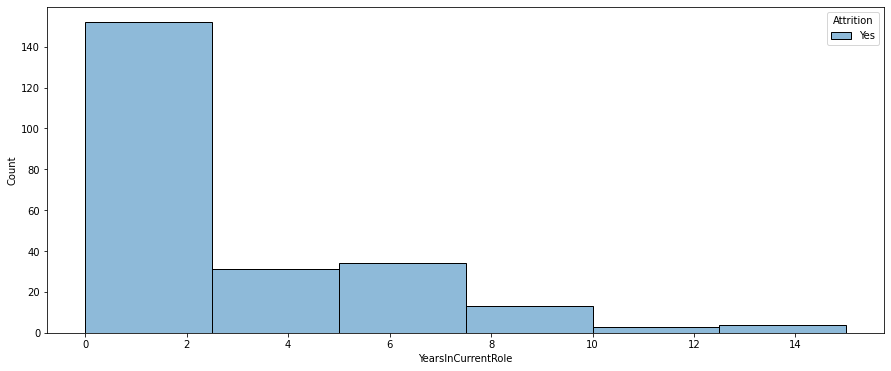

In [127]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1[df1['Attrition']=='Yes'],x='YearsInCurrentRole',palette='tab20',hue='Attrition',bins=6)

Segun el siguiente histograma se puede entender que los empleados que previamente solo han trabajado en 1 o 2 empresas son los que más desertan.

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

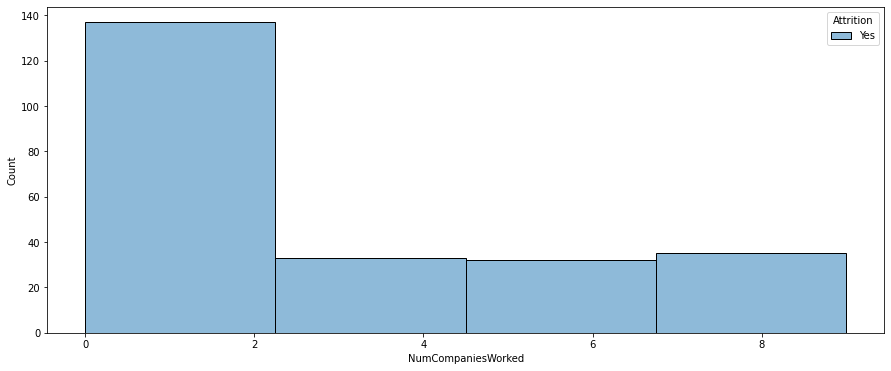

In [136]:
plt.figure(figsize=(15,6))
sns.histplot(data=df1[df1['Attrition']=='Yes'],x='NumCompaniesWorked',palette='tab20',hue='Attrition',bins=4)


¿Todo esto como se alinea con el negocio? Para la empresa es una ventaja significativa poder identificar el comportamiento de las personas que van a renunciar de su trabajo ya que pueden tomar acciones correctivas que disminuya la tasa de desercion logrando evitar:
- Elevación de costos por contratos de nuevo personal
- Disminución en la productividad
- Perdida de personal ya entrenado y con grandes capacidades
- Desaseleración del crecimiento de la empresa
